In [1]:
# imporing necessary libraries
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
from scipy.special import expit

print('scipy.special.expit is the logistic sigmoid function')

scipy.special.expit is the logistic sigmoid function


Let's then generate 5 data points from two normally distributed classes.

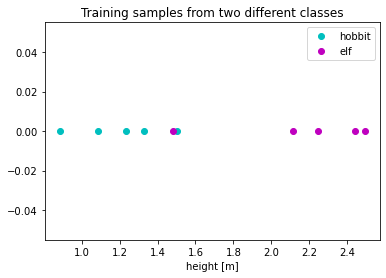

In [2]:
np.random.seed(13)
x_h = np.random.normal(1.1,0.3,5)
x_e = np.random.normal(1.9,0.4,5)
plt.plot(x_h,np.zeros([5,1]),'co', label="hobbit")
plt.plot(x_e,np.zeros([5,1]),'mo', label="elf")
plt.title('Training samples from two different classes')
plt.legend()
plt.xlabel('height [m]')
plt.show()

Let's assign each point suitable output (𝑦∈0,1).

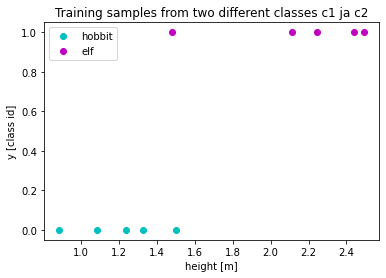

In [3]:
y_h = np.zeros(x_h.shape)
y_h[:] = 0.0
y_e = np.zeros(x_e.shape)
y_e[:] = +1.0
plt.plot(x_h,y_h,'co', label="hobbit")
plt.plot(x_e,y_e,'mo', label="elf")
plt.title('Training samples from two different classes c1 ja c2')
plt.legend()
plt.xlabel('height [m]')
plt.ylabel('y [class id]')
plt.show()

Let's put all training data points to the same vectors

In [4]:
x_tr = np.concatenate((x_h,x_e))
y_tr = np.concatenate((y_h,y_e))
print(f'The size of x is {x_tr.size}')
print(f'The size of y is {y_tr.size}')

The size of x is 10
The size of y is 10


### Gradient Descent (GD)

Gradient descent is more popular training algorithm than the Hebbian learning rule.

\begin{equation}
    w_i^{t+1} = w_i^t-\mu\frac{\partial\epsilon_{MSE}}{\partial w_i}
\end{equation}


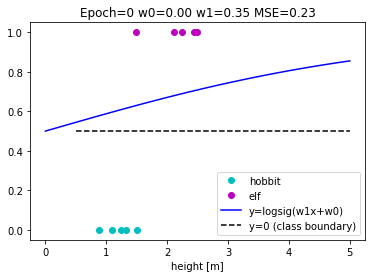

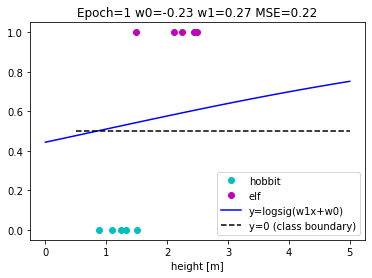

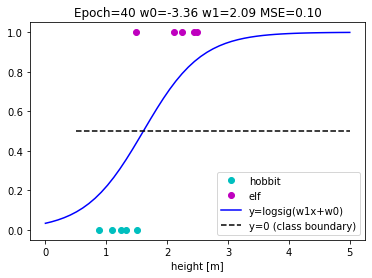

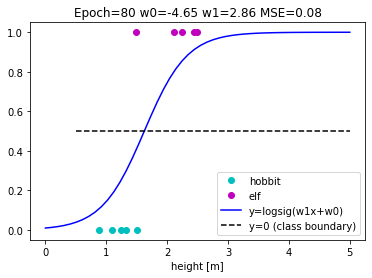

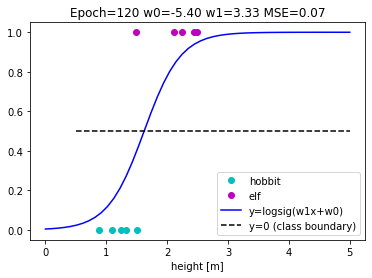

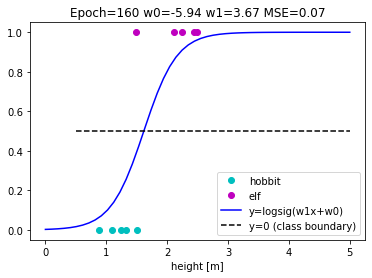

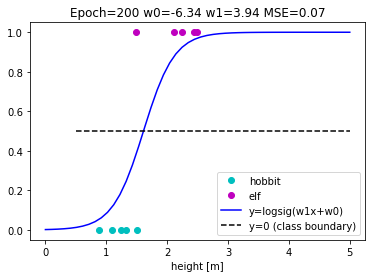

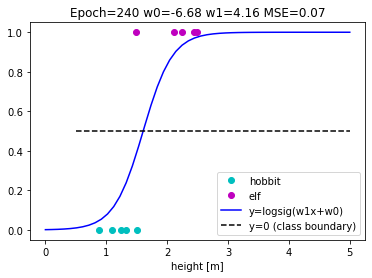

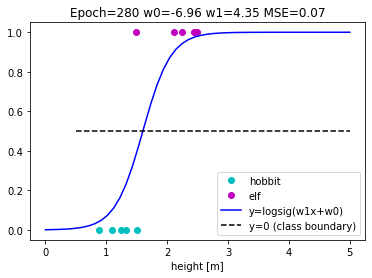

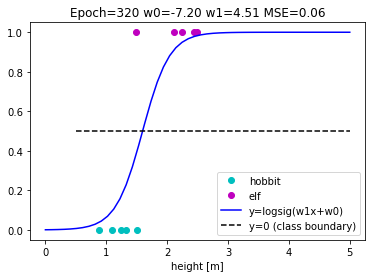

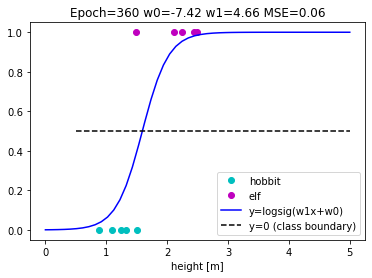

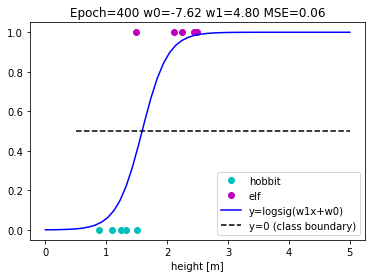

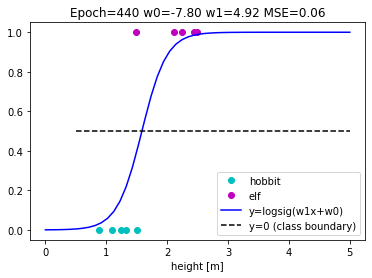

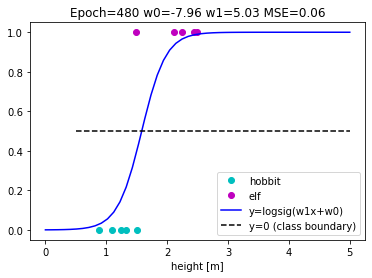

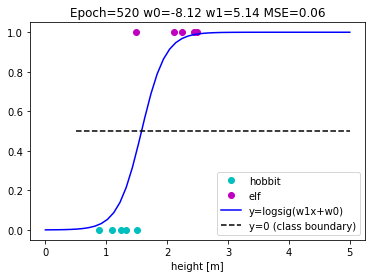

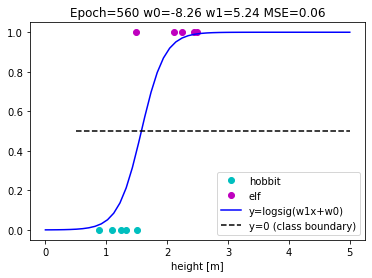

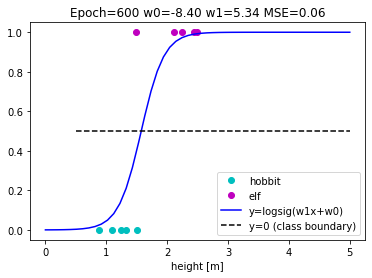

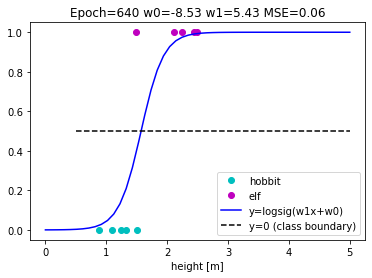

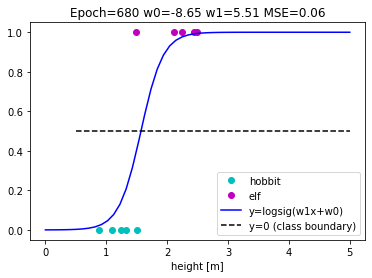

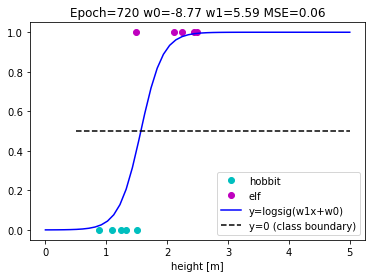

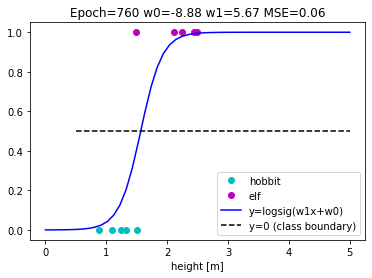

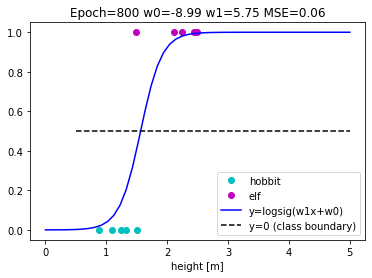

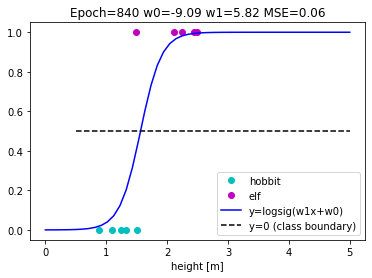

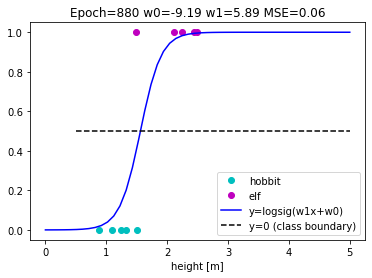

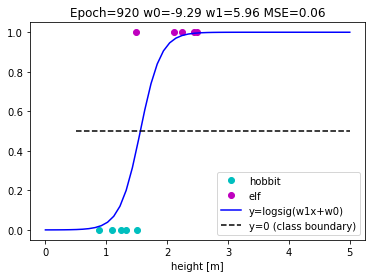

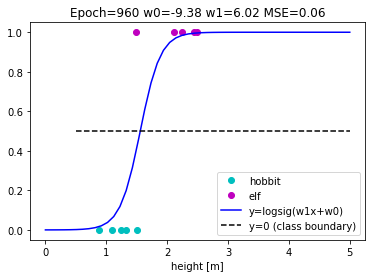

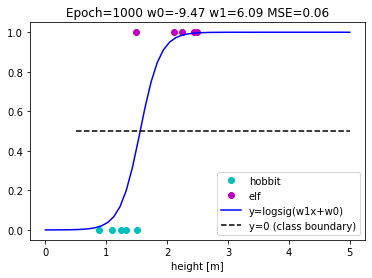

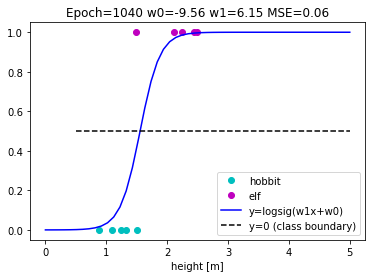

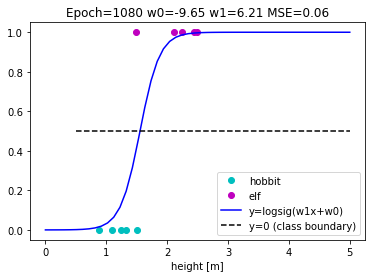

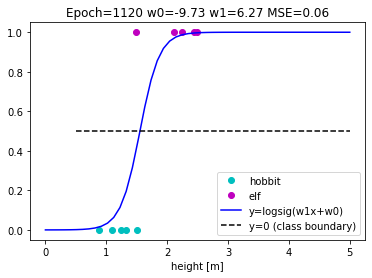

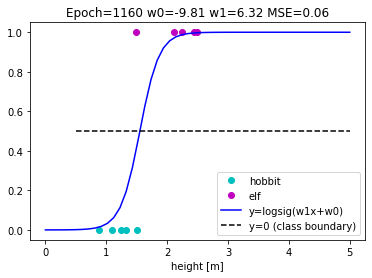

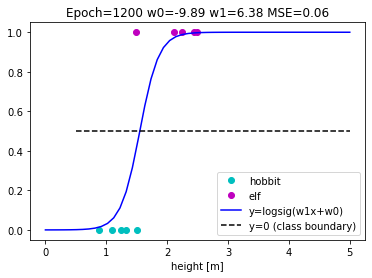

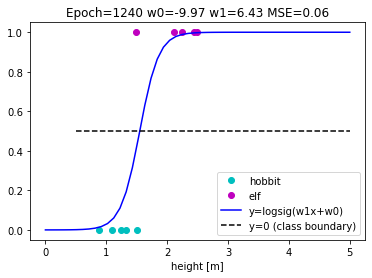

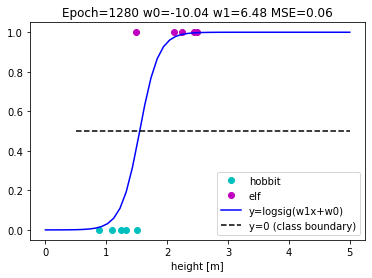

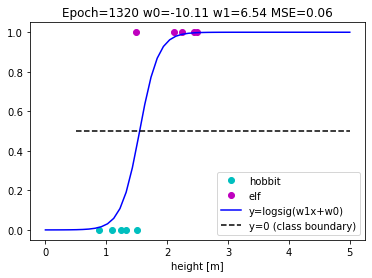

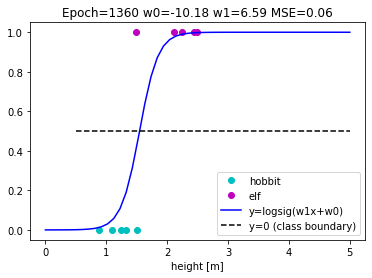

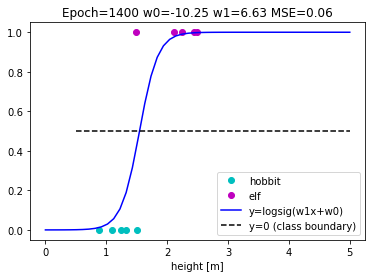

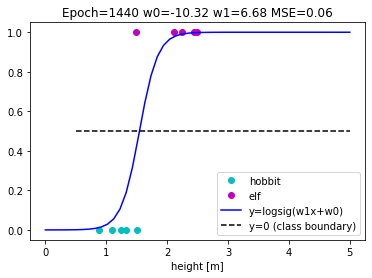

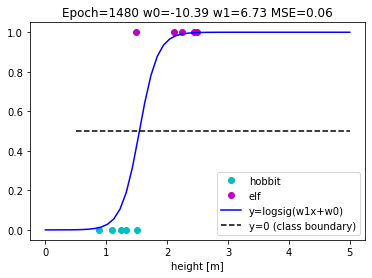

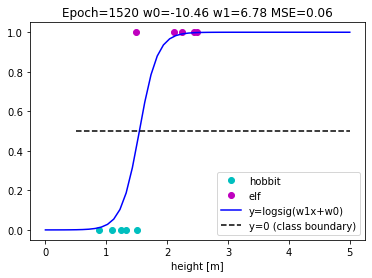

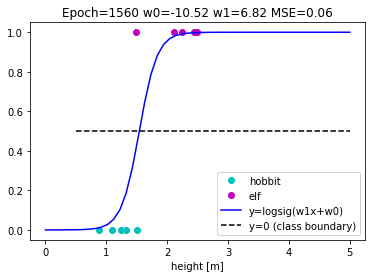

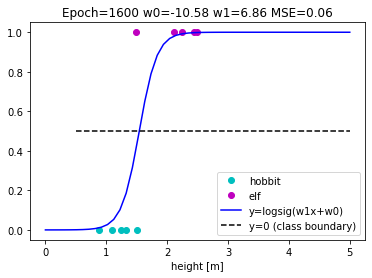

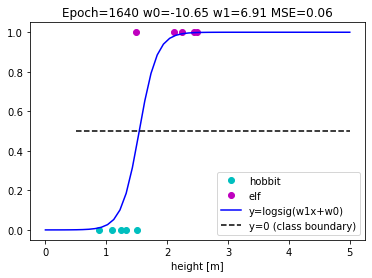

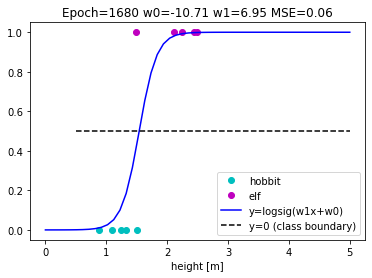

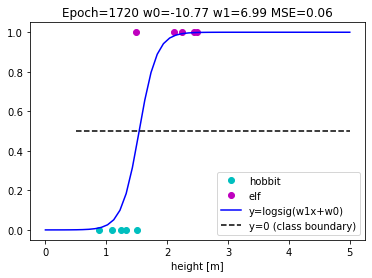

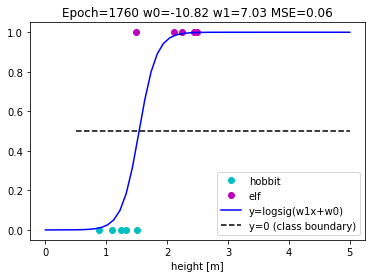

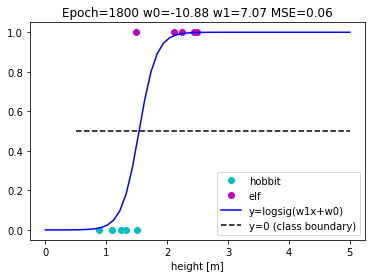

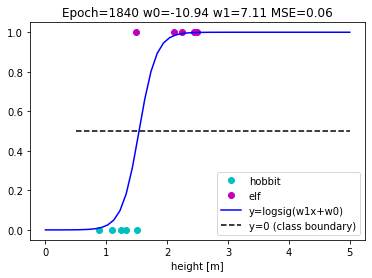

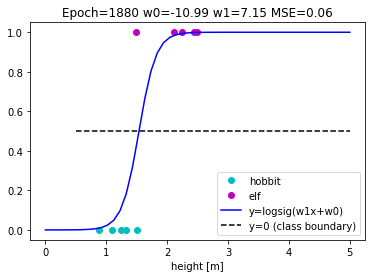

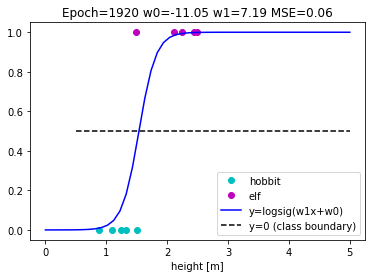

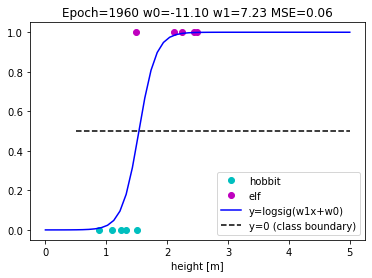

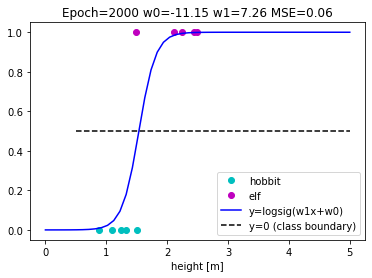

True values y=[0. 0. 0. 0. 0. 1. 1. 1. 1. 1.] and predicted values y_pred=[0.00886451 0.17917918 0.03691891 0.10156993 0.4419258  0.9851256
 0.99859925 0.99422629 0.99903526 0.40351634]


In [18]:
# Compute MSE heat map for different a and b
w0_t = 0
w1_t = 0
num_of_epochs = 2001
learning_rate = 0.3

for e in range(num_of_epochs):
    y = expit(w1_t*x_tr+w0_t)
    
    # gradiant calculation
    gd_w1 = -np.sum(2*x_tr*(y_tr-y)*y*(1-y))
    gd_w0 = -np.sum(2*(y_tr-y)*y*(1-y))
    
    # updating weights
    w1_t = w1_t-learning_rate*gd_w1
    w0_t = w0_t-learning_rate*gd_w0
    
    # Plot after every 40th epoch
    if np.mod(e,40) == 0 or e == 1: 
        y_pred = expit(w1_t*x_tr+w0_t)
        MSE = np.sum((y_tr-y_pred)**2)/(len(y_tr))
        
        plt.title(f'Epoch={e} w0={w0_t:.2f} w1={w1_t:.2f} MSE={MSE:.2f}')
        plt.plot(x_h,y_h,'co', label="hobbit")
        plt.plot(x_e,y_e,'mo', label="elf")
        x = np.linspace(0.0,+5.0,50)
        plt.plot(x,expit(w1_t*x+w0_t),'b-',label='y=logsig(w1x+w0)')
        plt.plot([0.5, 5.0],[0.5,0.5],'k--',label='y=0 (class boundary)')
        plt.xlabel('height [m]')
        plt.legend()
        plt.show()

print(f'True values y={y_tr} and predicted values y_pred={y_pred}')

In [6]:
def grdiant_discent(int_w0, int_w1,epochs, lr):
    # Compute MSE heat map for different a and b
    w0_t = int_w0
    w1_t = int_w1
    num_of_epochs = epochs
    learning_rate = lr

    for e in range(num_of_epochs):
        y = expit(w1_t*x_tr+w0_t)
    
        # gradiant calculation
        gd_w1 = -np.sum(2*x_tr*(y_tr-y)*y*(1-y))
        gd_w0 = -np.sum(2*(y_tr-y)*y*(1-y))
    
        # updating weights
        w1_t = w1_t-learning_rate*gd_w1
        w0_t = w0_t-learning_rate*gd_w0
    
        # Plot after every 40th epoch
        if np.mod(e,40) == 0 or e == 1: 
            y_pred = expit(w1_t*x_tr+w0_t)
            MSE = np.sum((y_tr-y_pred)**2)/(len(y_tr))
        
            plt.title(f'Epoch={e} w0={w0_t:.2f} w1={w1_t:.2f} MSE={MSE:.2f}')
            plt.plot(x_h,y_h,'co', label="hobbit")
            plt.plot(x_e,y_e,'mo', label="elf")
            x = np.linspace(0.0,+5.0,50)
            plt.plot(x,expit(w1_t*x+w0_t),'b-',label='y=logsig(w1x+w0)')
            plt.plot([0.5, 5.0],[0.5,0.5],'k--',label='y=0 (class boundary)')
            plt.xlabel('height [m]')
            plt.legend()
            plt.show()

    print(f'True values y={y_tr} and predicted values y_pred={y_pred}')
    

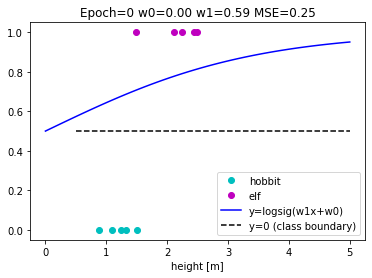

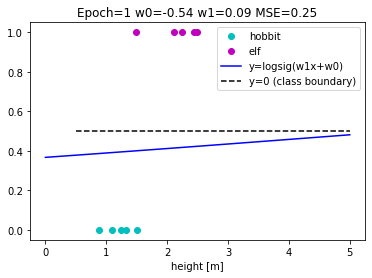

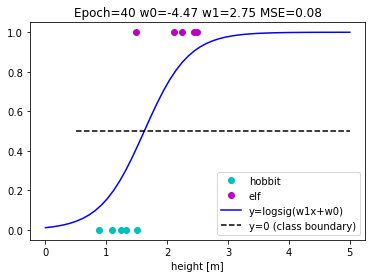

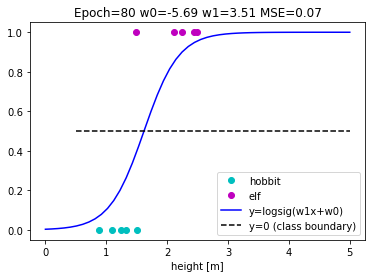

True values y=[0. 0. 0. 0. 0. 1. 1. 1. 1. 1.] and predicted values y_pred=[0.07077112 0.26303265 0.13339538 0.2061349  0.39956531 0.84977123
 0.94693164 0.89977961 0.95530408 0.38144571]


In [7]:
grdiant_discent(0,0,100,0.5)

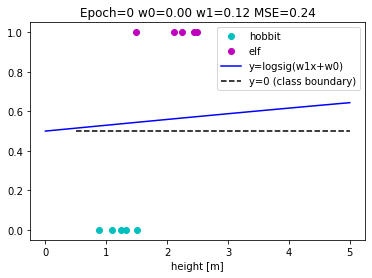

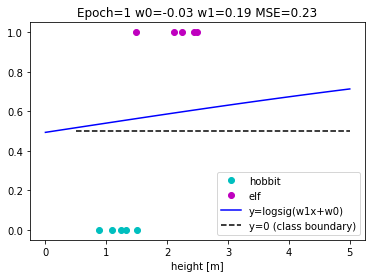

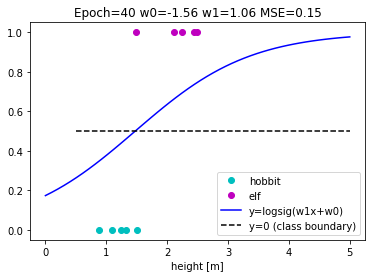

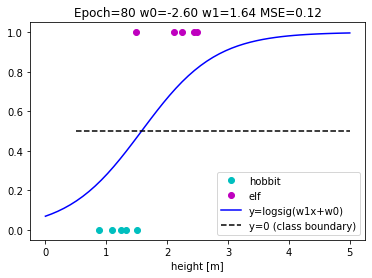

True values y=[0. 0. 0. 0. 0. 1. 1. 1. 1. 1.] and predicted values y_pred=[0.24228024 0.3972697  0.30774135 0.3621994  0.46876452 0.70622304
 0.80457199 0.74903155 0.81752203 0.45989593]


In [8]:
grdiant_discent(0,0,100,0.1)